In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [3]:
data.head(4)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5


In [4]:
#EDA

In [5]:
#Droppping down Unnamed: 0  column from the dataset.

data.drop('Unnamed: 0', axis = 1, inplace = True)

In [32]:
data.isnull().sum() #with it we found that there is no null values in it.

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [139]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [33]:
#With the above we found how the data is distributed

In [141]:
data.shape

(200, 4)

In [142]:
#We find that there are 200 rows and 4columns

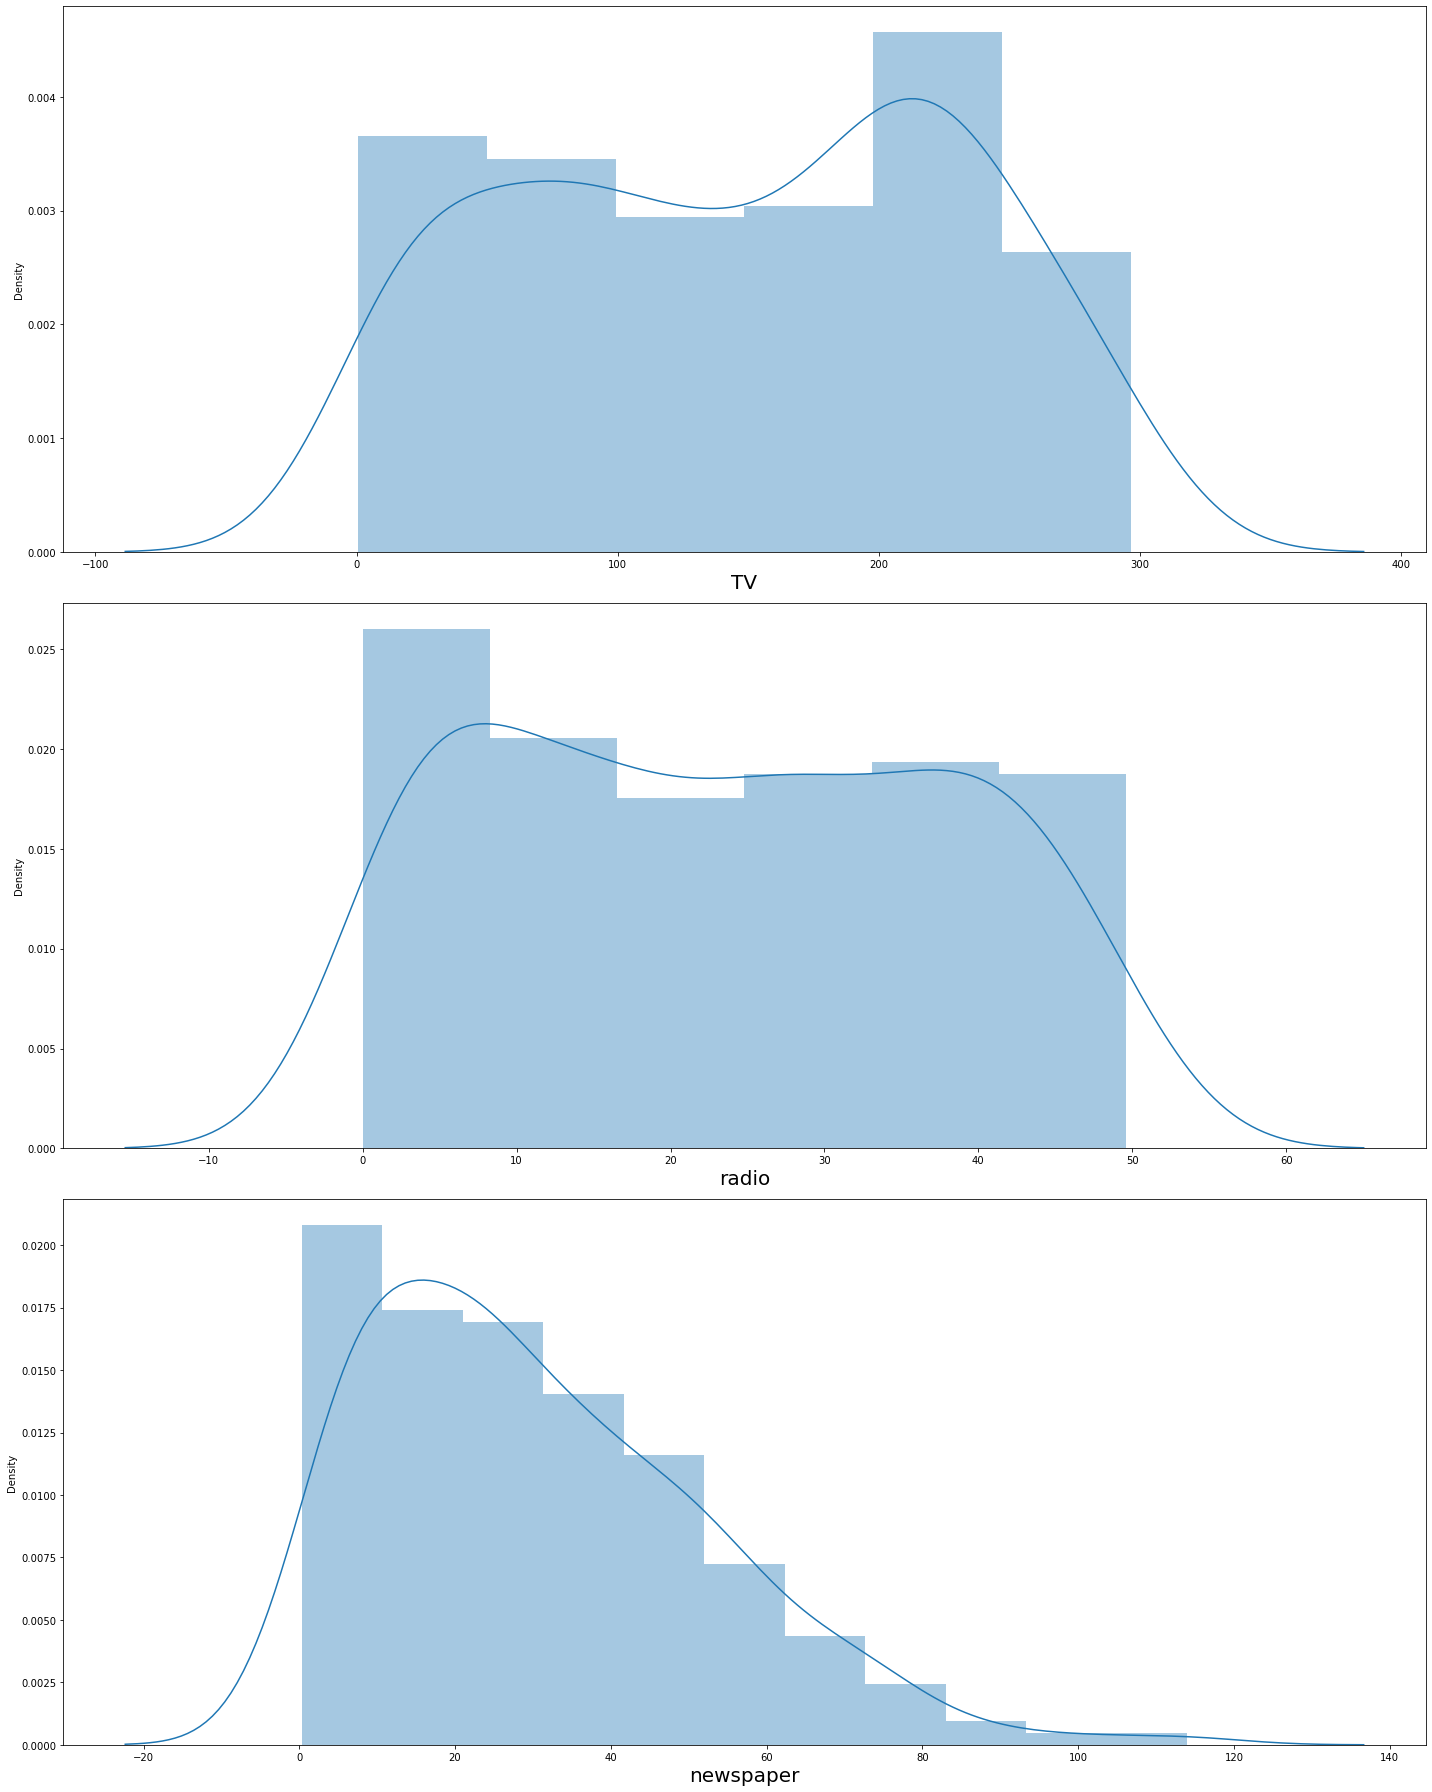

In [7]:
#Plotting dist plot to check for skewness

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 3:
        ax=plt.subplot(3,1, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize= 20)
        
    plotnumber+=1
plt.tight_layout()        

In [155]:
#With the above plots it looks like there is little bit of skewness in the column newspaper which we will remove 
#with the method quantile.

In [12]:
#Using quantile method to remove the skewness of newspaper column
q = data['newspaper'].quantile(0.98)
new_data = data[data['newspaper']<q]

In [13]:
#Checking how the data is distributed again with the help of distplot

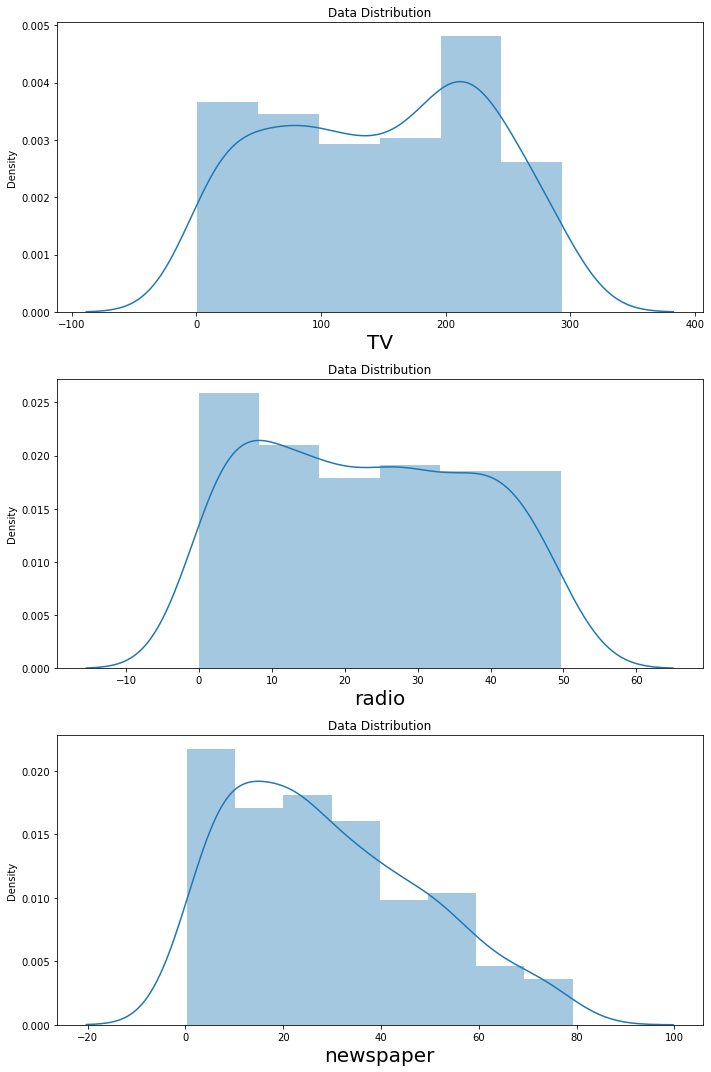

In [14]:
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in new_data:
    if plotnumber<=3:
        ax = plt.subplot(3,1,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column, fontsize=20)
        plt.title('Data Distribution')
    
    plotnumber+=1
plt.tight_layout()

In [15]:
#Now the data looks good, we will proceed ahead and check the relation of each feature with the label to see if they are positively related or not.

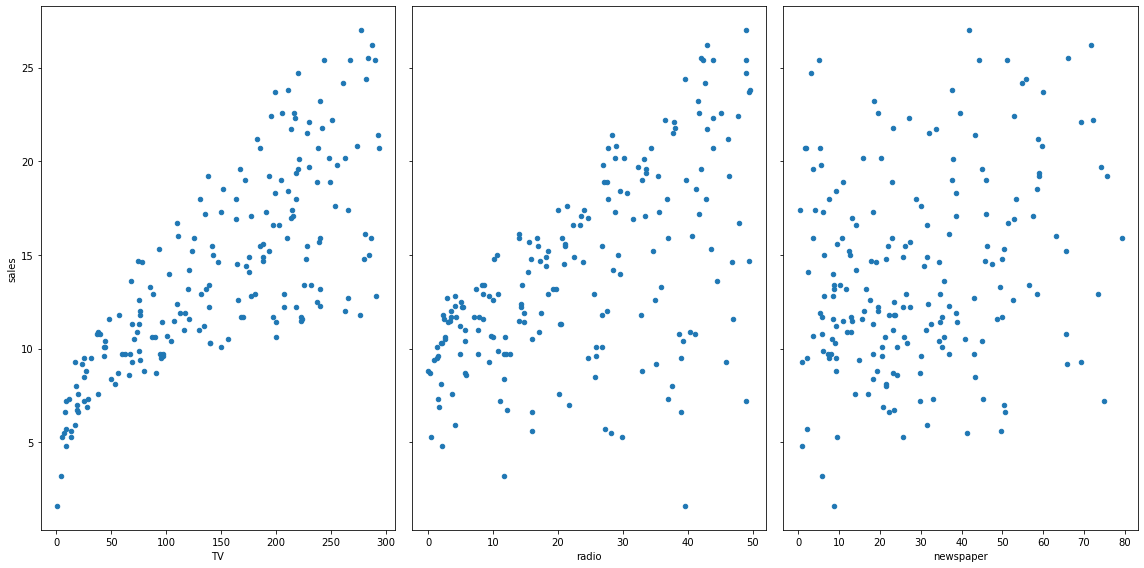

In [28]:
#Plotting scatter plot to see the relation of features with label

fig, axs = plt.subplots(1,3,sharey=True)
new_data.plot(kind='scatter',x = 'TV', y = 'sales',ax=axs[0], figsize=(16,8))
new_data.plot(kind='scatter',x = 'radio', y = 'sales', ax=axs[1])
new_data.plot(kind='scatter',x = 'newspaper', y = 'sales', ax=axs[2])
plt.tight_layout()

In [29]:
#1.With above plotting we see that TV is positively related with sales(increasing TV investment increases the sales)
#2.Radio is also potivetely related with sales(increasing Radio investment increases the sales).
#3.Newspaper is not positively related ( it doesnt gives us any idea how the newspaper will improve our sales). 

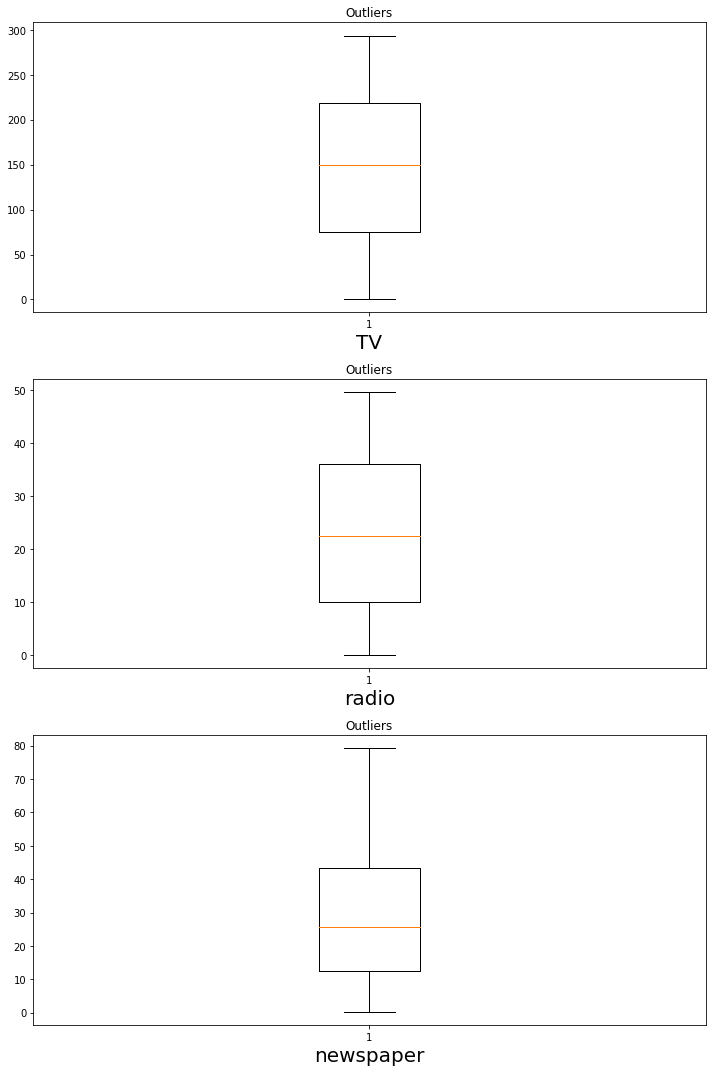

In [36]:
#Checking for outliers
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in new_data:
    if plotnumber<=3:
        ax = plt.subplot(3,1,plotnumber)
        plt.boxplot(new_data[column])
        plt.xlabel(column, fontsize=20)
        plt.title('Outliers')
    
    plotnumber +=1
plt.tight_layout()

In [21]:
#Now will check the collinearity between the features with the help of heatmap.

In [37]:
corr_mat = new_data.corr()
corr_mat

,TV,radio,newspaper,sales
TV,1.000000,0.070843,0.061320,0.782440
radio,0.070843,1.000000,0.362191,0.588494
newspaper,0.061320,0.362191,1.000000,0.251373
sales,0.782440,0.588494,0.251373,1.000000


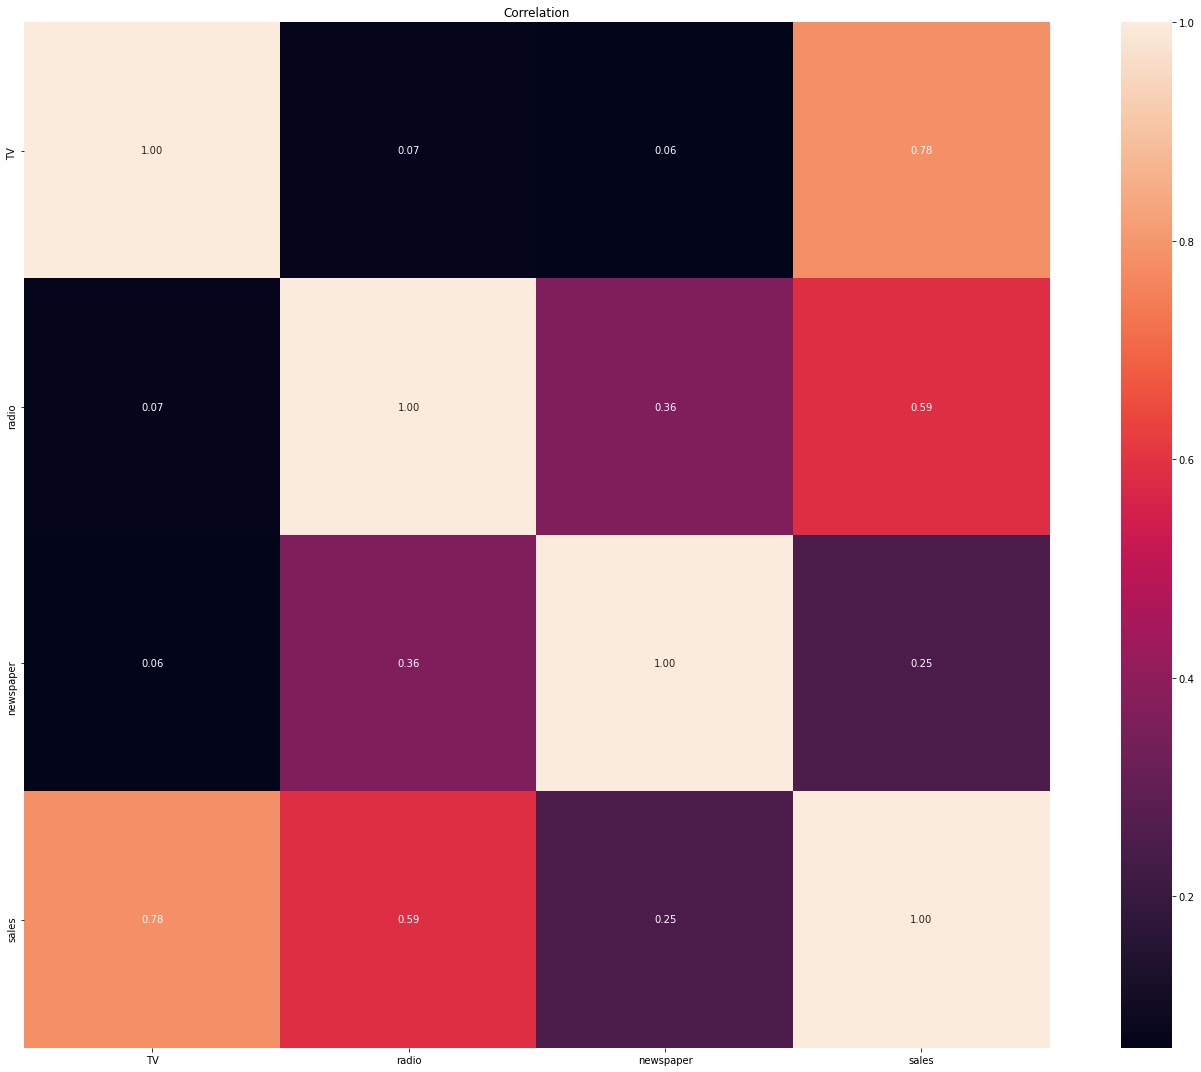

In [38]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True,cbar=True,square=True,fmt='.2f')
plt.title('Correlation')
plt.tight_layout()

In [39]:
# with above observation we see that there is no collinearity among the featues so we are good to go with model building.

In [38]:
#Now we will devide the dataset into features and labels to build our model.

In [40]:
x = new_data.drop(['sales'], axis = 1)
y = new_data['sales']

In [41]:
#Build the model

In [42]:
# Import Standard Scaler to scale the data

In [43]:
from sklearn.preprocessing import StandardScaler

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [51]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [52]:
#Importing Train Test Split to train and test the model

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 390)

In [49]:
#Now Model Initiating and Training

In [56]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
SVR = SVR()

In [63]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
SVR.fit(x_train,y_train)
print("All Models Trained")

All Models Trained


In [58]:
#Prediction Scores for each trained model

In [59]:
LR.score(x_test,y_test)

0.8543324479634553

In [60]:
DT.score(x_test,y_test)

0.9610718636308312

In [61]:
RF.score(x_test,y_test)

0.9858789525201519

In [64]:
SVR.score(x_test,y_test)

0.9253524484974516

In [65]:
#With the above adjusted r2 score of all the models we see that RandomForestRegressor is giving us the best prediction.

In [66]:
#Now will check the mean squared error of each trained model.

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
y_pred1=LR.predict(x_test)
y_pred2 =DT.predict(x_test)
y_pred3=RF.predict(x_test)
y_pred4=SVR.predict(x_test)

In [69]:
mean_squared_error(y_test,y_pred1) # For the linear regression model

3.5604754989644434

In [70]:
mean_squared_error(y_test,y_pred2) #For the Decision Tree Regressor Model

1.0197500000000002

In [71]:
mean_squared_error(y_test,y_pred3) # For the random forest regressor model

0.3346510999999971

In [72]:
mean_squared_error(y_test,y_pred4) #For support vector regressor model.

1.8245709114122526

In [149]:
#It has become quite clear with the above scores that RandomForestRegressor is best 
#fit for this model as the mean_squared_error of it is least as compared with all others models

In [74]:
##Doing hyper parameter tuning for it

In [75]:
from sklearn.model_selection import GridSearchCV

In [117]:
params = {'n_estimators':[120,130,150],
         'max_depth':[18,24,26],
         'min_samples_leaf': [4,3,2],
         'min_samples_split': [8,7,6]}

In [118]:
grid = GridSearchCV(RF, param_grid= params, cv= 8, n_jobs=-1)

In [119]:
grid.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [18, 24, 26],
                         'min_samples_leaf': [4, 3, 2],
                         'min_samples_split': [8, 7, 6],
                         'n_estimators': [120, 130, 150]})

In [121]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'max_depth': 24, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 120}


In [120]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [122]:
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=24, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=120)

In [123]:
y_pred =  clf.predict(x_test)

In [124]:
mean_squared_error(y_test,y_pred)

0.40682942234209135

In [125]:
clf.score(x_test,y_test)

0.9833556371708638

In [143]:
mean_absolute_error(y_test,y_pred)

0.5287113869348238

In [146]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.637831813523041

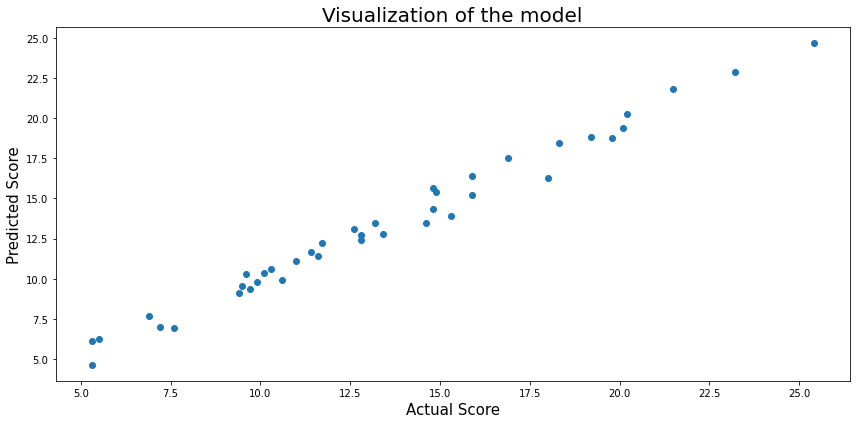

In [126]:
plt.figure(figsize = [12,6])
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

In [127]:
#Saving the model

In [128]:
import joblib

In [153]:
filename = 'Sales_Prediction_Model.sav'
joblib.dump(clf, filename)

['Sales_Prediction_Model.sav']